In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
import math
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [4]:
df=pd.read_csv(r'C:\Users\aishw\Downloads\rbl\data.csv')
df.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


# **discovering data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [6]:
df['Age'].value_counts()

20    21
17    20
35    20
25    19
22    18
28    18
21    16
27    15
30    14
24    14
19    13
26    13
23    12
29    10
16    10
38    10
40     9
31     9
50     9
34     8
48     8
18     8
33     7
43     7
51     7
49     7
46     6
41     6
44     6
53     5
15     5
54     5
36     5
37     5
45     4
47     4
39     4
56     3
32     3
42     3
52     2
57     2
58     2
55     1
59     1
68     1
77     1
67     1
69     1
70     1
64     1
Name: Age, dtype: int64

In [7]:
df['Location'].value_counts()

1    371
0     20
2      9
Name: Location, dtype: int64

In [8]:
df['Frequency'].value_counts()

1    189
2     76
5     70
3     34
4     20
7      5
6      5
8      1
Name: Frequency, dtype: int64

In [9]:
df['Duration'].value_counts()

1    227
2    102
3     71
Name: Duration, dtype: int64

In [10]:
df['Ataxia'].value_counts()

0    400
Name: Ataxia, dtype: int64

In [11]:
df.describe()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000
mean,31.705000,1.610000,2.365000,0.972500,0.977500,2.47000,0.987500,0.322500,0.977500,0.980000,...,0.0025,0.125000,0.060000,0.015000,0.005000,0.015000,0.0,0.017500,0.007500,0.410000
std,12.139043,0.770964,1.675947,0.268186,0.277825,0.76849,0.111242,0.468019,0.148489,0.140175,...,0.0500,0.331133,0.237784,0.121705,0.070622,0.121705,0.0,0.131289,0.086385,0.492449
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.000000,2.000000,4.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


<AxesSubplot:>

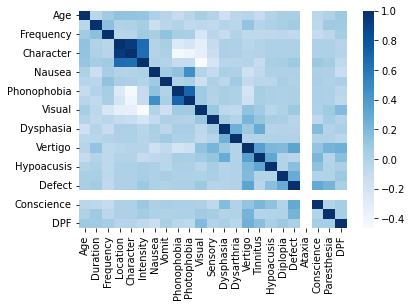

In [12]:
sns.heatmap(df.corr(),cmap='Blues')

In [13]:
print(df.columns)

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')


In [14]:
df.drop(['Ataxia'],1,inplace=True)

C:\Users\aishw\AppData\Local\Temp\ipykernel_9448\1936783196.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Ataxia'],1,inplace=True)


# **visulization**

In [15]:
df['Type'].unique()

array(['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine'], dtype=object)

In [16]:
len(df['Type'].value_counts())

7

<AxesSubplot:xlabel='Age', ylabel='Count'>

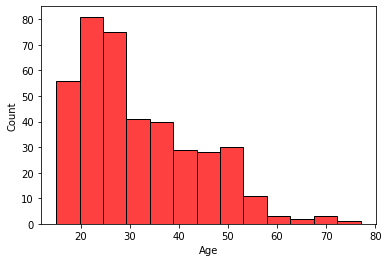

In [17]:
sns.histplot(df["Age"],color='r')

Text(0.5, 1.0, 'Frequency of different Types')

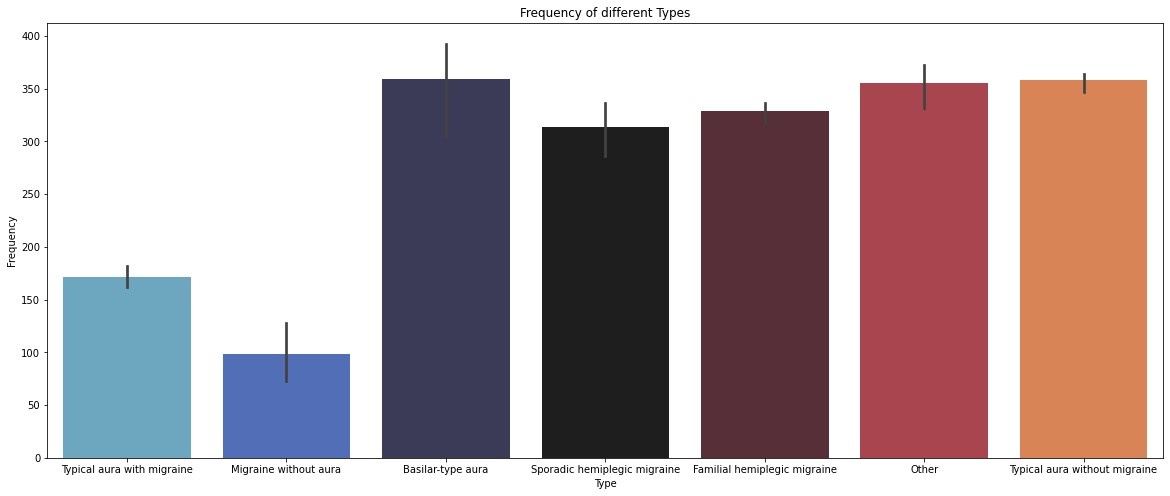

In [19]:
a=np.arange(1,401)
ax=plt.figure(figsize=(20,8))
sns.barplot(x='Type',y=a,data=df,palette='icefire')
plt.ylabel('Frequency')
plt.title('Frequency of different Types')

plt.figure(figsize=(20,10))
sns.boxplot(x="Dysphasia", y="Type", data=df)

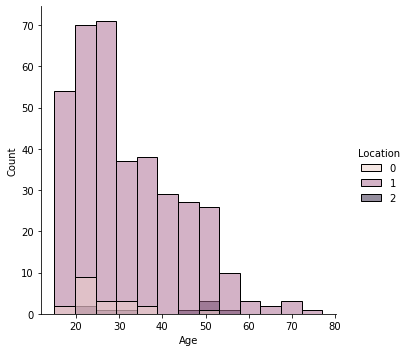

In [20]:
sns.displot(df, x="Age", hue="Location")

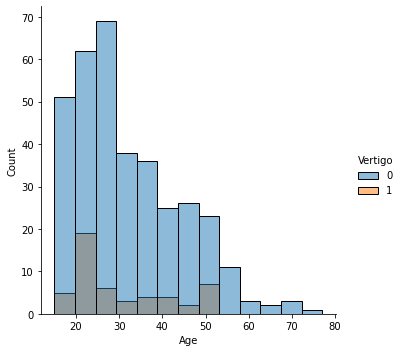

In [21]:
sns.displot(df, x="Age", hue="Vertigo")

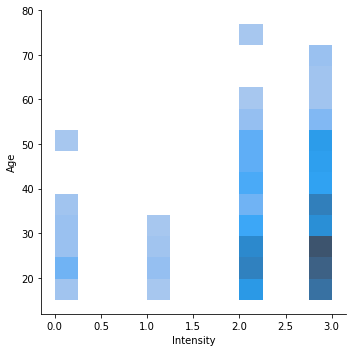

In [22]:
sns.displot(x="Intensity", y="Age", data=df)

# **Splitting the data**

In [24]:
x=df.drop(['Type'],1)
y=df['Type'].copy()

C:\Users\aishw\AppData\Local\Temp\ipykernel_9448\1006572068.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=df.drop(['Type'],1)


In [25]:
print(y)

0      Typical aura with migraine
1      Typical aura with migraine
2      Typical aura with migraine
3      Typical aura with migraine
4      Typical aura with migraine
                  ...            
395             Basilar-type aura
396             Basilar-type aura
397             Basilar-type aura
398             Basilar-type aura
399             Basilar-type aura
Name: Type, Length: 400, dtype: object


In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 101)

In [27]:
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(xtrain)
X_test_scale = scaler.transform(xtest)

# **Models**

In [28]:
kRange = range(1,15,1)
scores_list = []
for i in kRange:
    knn =  KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scale,ytrain)
    ypredr = knn.predict(X_test_scale)
Acc_KNN=accuracy_score(ypredr, ytest)
print('accuracy',Acc_KNN)


accuracy 0.8375


In [29]:

dtr = DecisionTreeClassifier(random_state=32)
dtr.fit(X_train_scale, ytrain)
ypreddtf = dtr.predict(X_test_scale)
Acc_DTC=accuracy_score(ypreddtf, ytest)
print('accuracy',Acc_DTC)


accuracy 0.825


In [30]:
#model = MLPClassifier(max_iter=500)
#mlp=MLPClassifier()
#mlp.fit(X_train_scale, ytrain)
#ypredmlp = mlp.predict(X_test_scale)
#Acc_mlp=accuracy_score(ypredmlp,ytest )
#print('accuracy',Acc_mlp)


In [31]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train_scale, ytrain)
ypredclf = clf.predict(X_test_scale)
Acc_clf=accuracy_score(ytest,ypredclf)
print('accuracy',Acc_clf)


accuracy 0.95


In [32]:
rfr = RandomForestClassifier(random_state= 32)
rfr.fit(X_train_scale, ytrain)
ypredrfr = rfr.predict(X_test_scale)
Acc_RF=accuracy_score(ypredrfr,ytest)
print('accuracy',Acc_RF)

accuracy 0.9


In [33]:
param_grid = {
        'hidden_layer_sizes': [(7, 7), (128,), (128, 7)],
        'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
        'epsilon': [1e-3, 1e-7, 1e-8, 1e-9, 1e-8]
    }
estimator = GridSearchCV(
        MLPClassifier(learning_rate='adaptive', learning_rate_init=1., early_stopping=True, shuffle=True),
        param_grid=param_grid, n_jobs=-1)
estimator.fit(X_train_scale, ytrain)
grid_predictions = estimator.predict(X_test_scale)
Acc_grid_mlp=accuracy_score(grid_predictions,ytest)
print('accuracy',Acc_grid_mlp)
 


accuracy 0.875


In [34]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grida = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
grida.fit(X_train_scale,ytrain)
grid_predictions = grida.predict(X_test_scale)
Acc_grid_scv=accuracy_score(grid_predictions,ytest)
print('accuracy',Acc_grid_scv)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

In [35]:
#Acc_grid_scv = 0.85

# Create DataFrame with model names and scores
models = pd.DataFrame({
    'Model': ['Random Forest', 'MLPClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'support vector classifier', 'svc with gridsearch', 'mlp with gridsearch'],
    'Score': [Acc_RF, Acc_mlp, Acc_KNN, Acc_DTC, Acc_clf, Acc_grid_scv, Acc_grid_mlp]
})

models.sort_values(by='Score', ascending=False)

NameError: name 'Acc_mlp' is not defined

In [36]:
Acc_grid_scv = 0.85

# Create DataFrame with model names and scores
models = pd.DataFrame({
    'Model': ['Random Forest', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'support vector classifier', 'svc with gridsearch', 'mlp with gridsearch'],
    'Score': [Acc_RF,  Acc_KNN, Acc_DTC, Acc_clf, Acc_grid_scv, Acc_grid_mlp]
})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,support vector classifier,0.9500
0,Random Forest,0.9000
5,mlp with gridsearch,0.8750
4,svc with gridsearch,0.8500
1,KNeighborsClassifier,0.8375
2,DecisionTreeClassifier,0.8250


In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_classifier = SVC()
svm_classifier.fit(X_train_scale, ytrain)
y_pred = svm_classifier.predict(X_test_scale)

accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.925


In [45]:
unseen_input = [[27,1,5,1,1,3,1,0,1,1,2,0,0,0,1,1,0,0,0,0,0,0,0]]

# Remove the extra feature from unseen_input
unseen_input = [unseen_input[0][:22]]

preprocessed_input = scaler.transform(unseen_input)
predictions = svm_classifier.predict(preprocessed_input)
print(predictions)


['Basilar-type aura']


C:\Users\aishw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
